In [147]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import math
import matplotlib as mpl
import random

# Assignment 3 - Clustering

For this assignment you'll need to use some clustering knowledge to build a function that can generate handwritten numbers from a provided number. 

The modelling parts of this assignment are not very complex, the application of the clustering algorithms is very similar to the examples from class. This will require a little more manipulation of data, and building a little bit of structure around the models, that's where some of the challenge lies. 

## Requirements
<ul>
<li>Use clustering to take the X data (the features/pixels) of the MNIST dataset, and group it into clusters. 
    <ul>
    <li>Do not use the targets from the dataset at all. 
    </ul>
<li>Assign labels to your clusters, so there is now a label for each cluster. You'll need to manually do a little mapping here by eye. 
<li>Use GMM to build a function that can generate a new digit from the information in the cluster. 
<li>Write a function, writeNumber, that can take in an integer (you can assume it is between 1 and 20 digits, this is mostly for printing purposes, the modelling part isn't impacted by this at all) and print out that integer as a generated handwritten number. 
<li><b>When generating the handwritten numbers, each version of a digit should be different. I.e. If the number printed is 22222, there should not be 5 identical 2s, they should vary a bit like real writing. </b>
</ul>

## Deliverables
Submit your .ipynb file to the Moodle dropbox. PLEASE make sure that the file runs BY ITSELF outside of importing libraries. It should not reference any other files, either data or code. 

Within your file, create a function called writeNumber, which takes a number as an input, and prints it out as a series of handwritten digits. The function should be callable like this, if I wanted to print the number 218201

~~~
writeNumber(218201)
~~~

This would produce something that looks, somewhat, like this:

![Writing Example](example.png "Writing Example" )

The exact appearance of the generated writing can vary, it likely won't be as well defined as this picture. As long as I can read it as a number, it is fine. 

Hint: the number of clusters may vary. 

## Grading
<ul>
<li> 70% - Code works. This is mostly a yes/no thing, if it doesn't work I'll try to see if it was a small or large issue in the code, but it largely works or it doesn't. 
<li> 20% - Numbers appearance. Is the writing OK? I'm not going to be overly picky, if they are reasonably legible, that is fine. 
<li> 10% - Code legibility. Is a quick read over of the code clear? Sections, comments, etc... 
</ul> 

## Load Data
<b> Please do not change this (substantially), probably outside of choosing between the full data and a subset. Don't load the target. </b>

Note: testing will be much faster with a subset of records. 

In [3]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


## Cluster 

We need to break the data into clusters first... 

<h1>Clustering with KMmeans<h1>

In [4]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(10, 784)

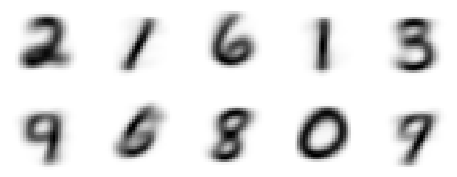

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

<h2>Mapping the Clusters</h2>
<p>Below I map the clusters to the index of the original data frame. I then make a copy of the dataframe and reshape it so that I can view the images.</p>
<p>I then plot a few clusters to determine which number belongs to which cluster.</p>
<p>After I pull the clusters out of the dataframe into their own dataframe. Sometimes I would get samples that had completely different numbers so I made a best guess</p>

In [6]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeans.labels_

In [7]:
X2 = X.to_numpy()
X2 = X2.reshape(70000, 28, 28)

<p>These are the groupings I found</p>
<ul>
<li>0 = Cluster 8</li>
<li>1 = Cluster 3</li>
<li>2 = Cluster 0</li>
<li>3 = Cluster 4</li>
<li>4 = Cluster 5</li>
<li>5 = Cluster 6</li>
<li>6 = Cluster 2</li>
<li>7 = Cluster 1</li>
<li>8 = Cluster 7</li>
<li>9 = Cluster 9</li>
</ul>

In [27]:
cluster_map[cluster_map['cluster'] == 9]

,data_index,cluster
4,4,9
9,9,9
15,15,9
19,19,9
22,22,9
...,...,...
69979,69979,9
69987,69987,9
69990,69990,9
69992,69992,9


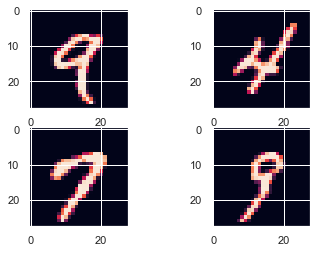

In [28]:
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(X2[4])
ax[0,1].imshow(X2[9])
ax[1,0].imshow(X2[15])
ax[1,1].imshow(X2[19])

<p>After looking at the numbers in each cluster, I realized that they are in the order of the index of the cluster centers that I had previously plotted.</p>
<p>Below, I pulled each cluster into their own data frame to seperately model the GMM</p>

In [52]:
zero = cluster_map[cluster_map['cluster'] == 8]
n0 = zero.index
n0_ = X.iloc[n0]

In [53]:
one = cluster_map[cluster_map['cluster'] == 3]
n1 = one.index
n1_ = X.iloc[n1]

In [54]:
two = cluster_map[cluster_map['cluster'] == 0]
n2 = two.index
n2_ = X.iloc[n2]

In [55]:
three = cluster_map[cluster_map['cluster'] == 4]
n3 = three.index
n3_ = X.iloc[n3]

In [58]:
four = cluster_map[cluster_map['cluster'] == 5]
n4 = four.index
n4_ = X.iloc[n4]

In [59]:
five = cluster_map[cluster_map['cluster'] == 6]
n5 = five.index
n5_ = X.iloc[n5]

In [60]:
six = cluster_map[cluster_map['cluster'] == 2]
n6 = six.index
n6_ = X.iloc[n6]

In [61]:
seven = cluster_map[cluster_map['cluster'] == 1]
n7 = seven.index
n7_ = X.iloc[n7]

In [62]:
eight = cluster_map[cluster_map['cluster'] == 7]
n8 = eight.index
n8_ = X.iloc[n8]

In [63]:
nine = cluster_map[cluster_map['cluster'] == 9]
n9 = nine.index
n9_ = X.iloc[n9]

<h1>GMM Modeling</h1>

In [102]:
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 5
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [64]:
#pca = PCA(0.99, whiten=True)  This did not work, I would get a shape of (n, 281) which could not be configured into an image
#data0 = pca.fit_transform(n0_)
#data1 = pca.fit_transform(n1_)
#data2 = pca.fit_transform(n2_)
#data3 = pca.fit_transform(n3_)
#data4 = pca.fit_transform(n4_)
#data5 = pca.fit_transform(n5_)
#data6 = pca.fit_transform(n6_)
#data7 = pca.fit_transform(n7_)
#data8 = pca.fit_transform(n8_)
#data9 = pca.fit_transform(n9_)

In [88]:
gmm0 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm0.fit(n0_)

gmm1 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm1.fit(n1_)

gmm2 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm2.fit(n2_)

gmm3 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm3.fit(n3_)

gmm4 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm4.fit(n4_)

gmm5 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm5.fit(n5_)

gmm6 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm6.fit(n6_)

gmm7 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm7.fit(n7_)

gmm8 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm8.fit(n8_)

gmm9 = GaussianMixture(10, covariance_type='full', random_state=0)
gmm9.fit(n9_)

GaussianMixture(n_components=10, random_state=0)

In [89]:
new0 = gmm0.sample(100)
new0 = new0[0]

new1 = gmm1.sample(100)
new1 = new1[0]

new2 = gmm2.sample(100)
new2 = new2[0]

new3 = gmm3.sample(100)
new3 = new3[0]

new4 = gmm4.sample(100)
new4 = new4[0]

new5 = gmm5.sample(100)
new5 = new5[0]

new6 = gmm6.sample(100)
new6 = new6[0]

new7 = gmm7.sample(100)
new7 = new7[0]

new8 = gmm8.sample(100)
new8 = new8[0]

new9 = gmm9.sample(100)
new9 = new9[0]


<h2>New Digits</h2>
<p>Half of the digits came out clearly, a few did not.</p>
<p>3, 5, 7, and 9 came out looking like other numbers.</p>
<p>3 seems to be a mix of 3, 5, and 8</p>
<p>5 looks like either 5 or 6</p>
<p>7 is made up of slanted 1's</p>
<p>9 is made up of slanted 4's</p>

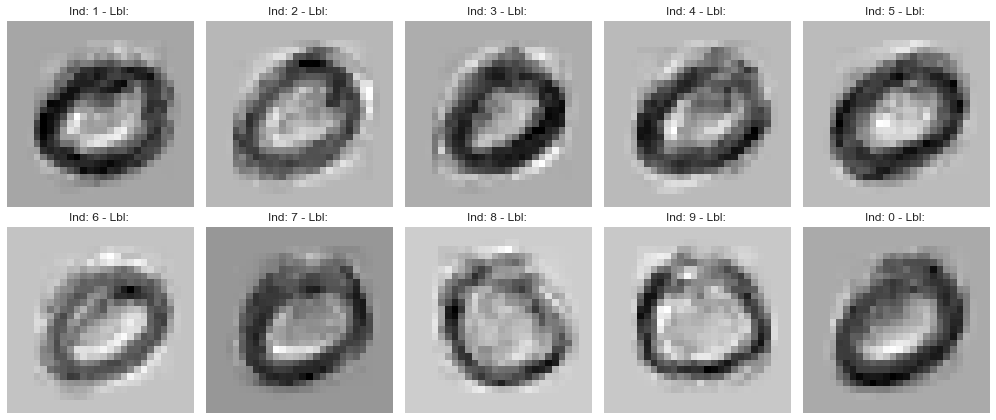

In [104]:
showDigits(digits=new0, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

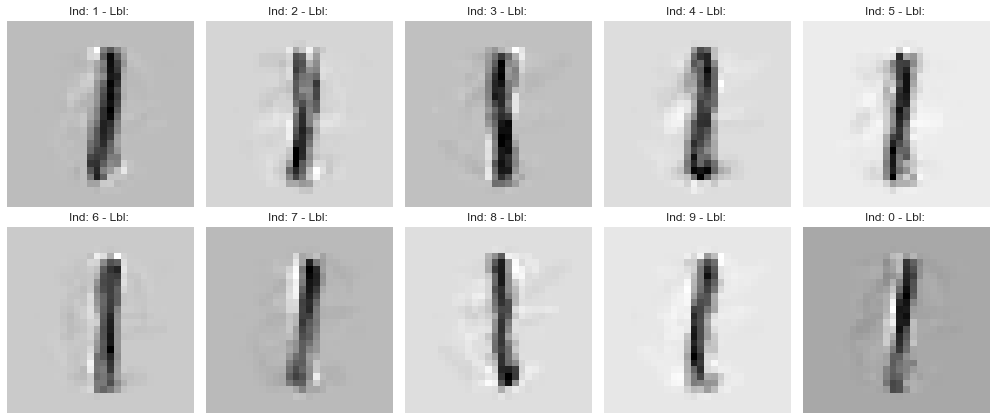

In [105]:
showDigits(digits=new1, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

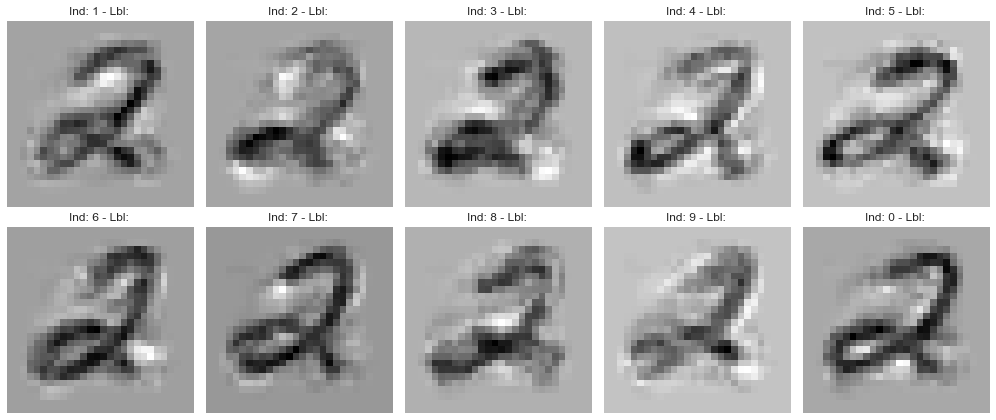

In [106]:
showDigits(digits=new2, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

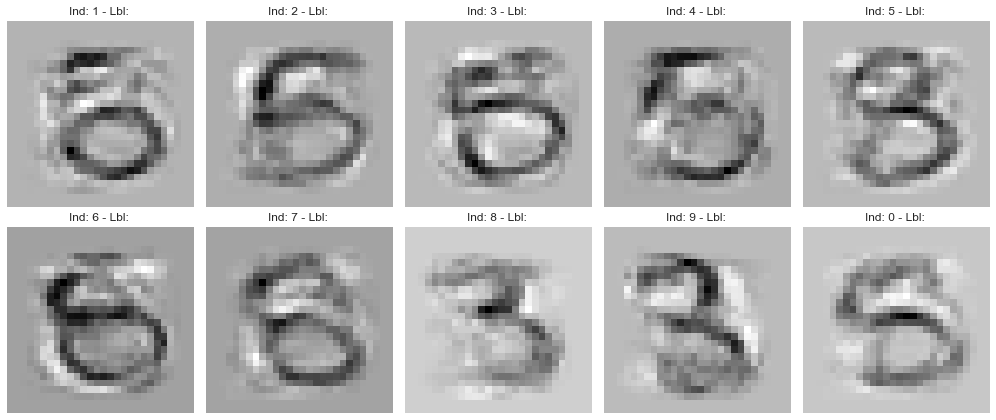

In [107]:
showDigits(digits=new3, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

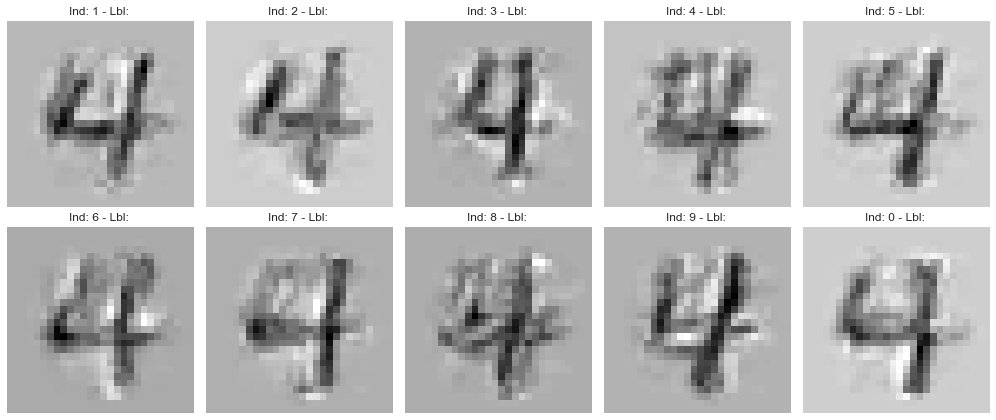

In [108]:
showDigits(digits=new4, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

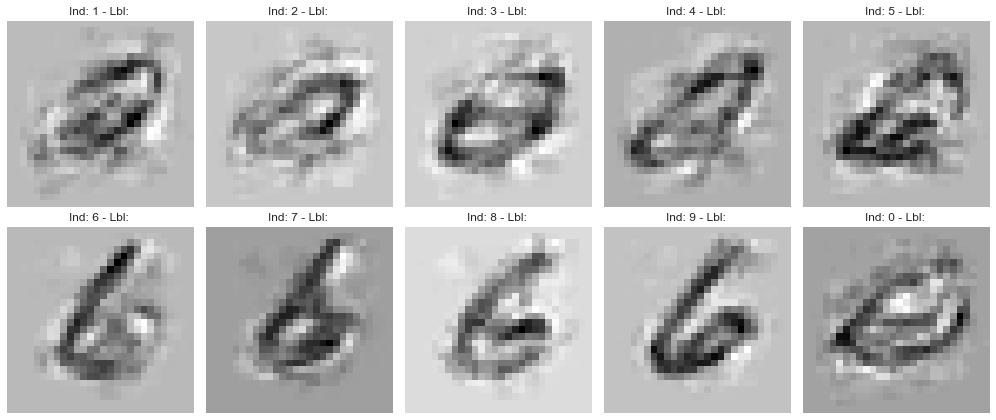

In [109]:
showDigits(digits=new5, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

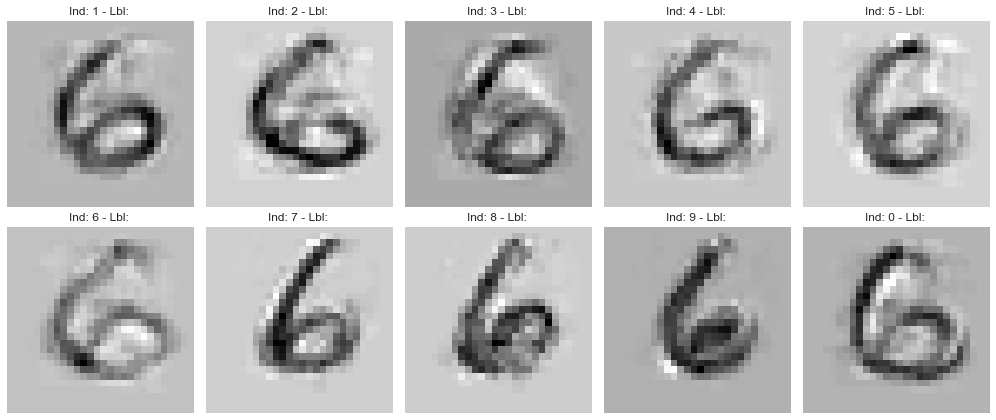

In [110]:
showDigits(digits=new6, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

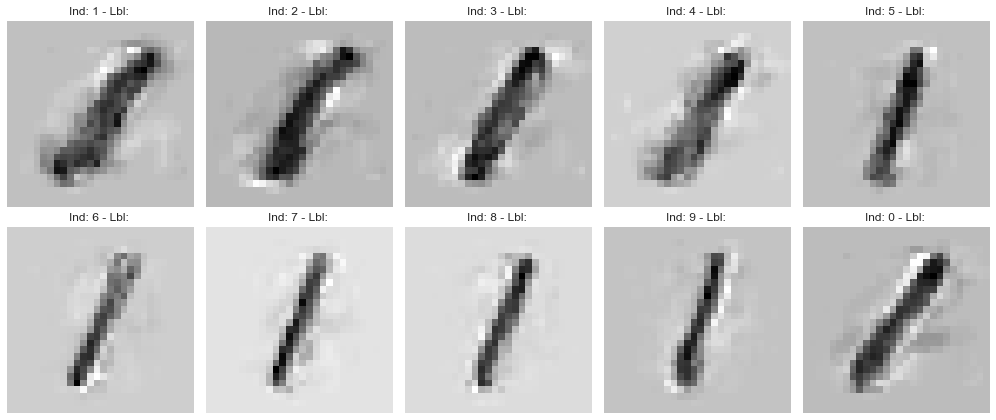

In [111]:
showDigits(digits=new7, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

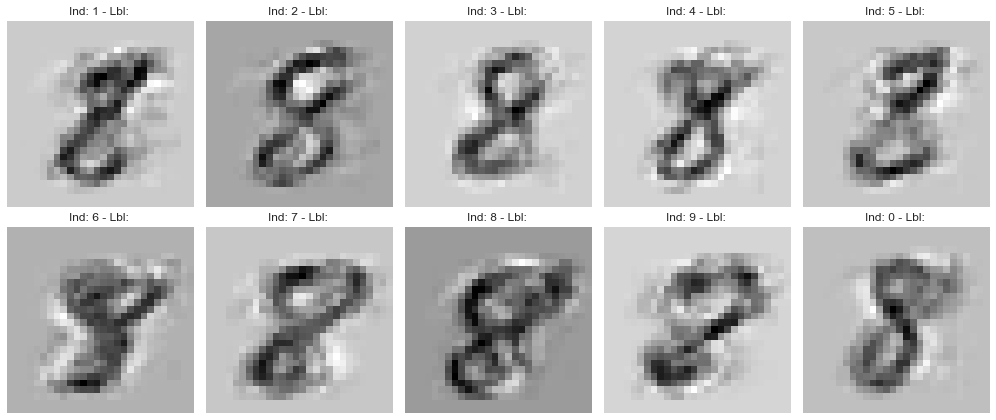

In [112]:
showDigits(digits=new8, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

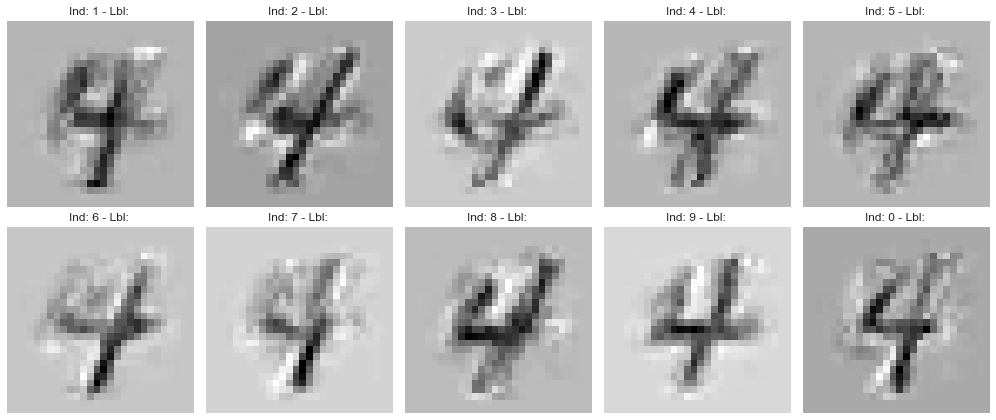

In [113]:
showDigits(digits=new9, labels=["","","","","","","","","",""], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

<h1>Creating the Function</h1>
<p>I created a list of all the generated numbers that the function could pull from</p>

In [ ]:
new_digits = [new0, new1, new2, new3, new4, new5, new6, new7, new8, new9]

In [148]:
def writeNumber(number):
    nums = [int(d) for d in str(number)] #Seperate the numbers into an array
    pics = len(nums)
    cols = len(nums)
    rows = 1
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    for i in range(0, pics):
        n = nums[i]
        some_digit = new_digits[n][random.randrange(0,99)]
        some_digit_image = np.array(some_digit).reshape(28, 28)
        ax = axes[i]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

<h2>Testing</h2>

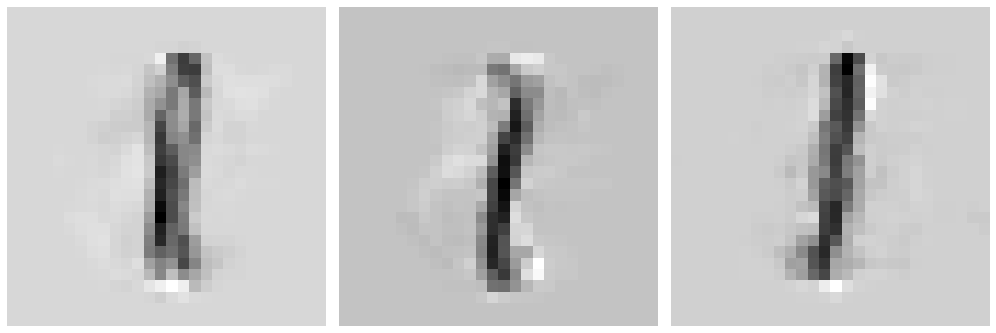

In [159]:
writeNumber(111)

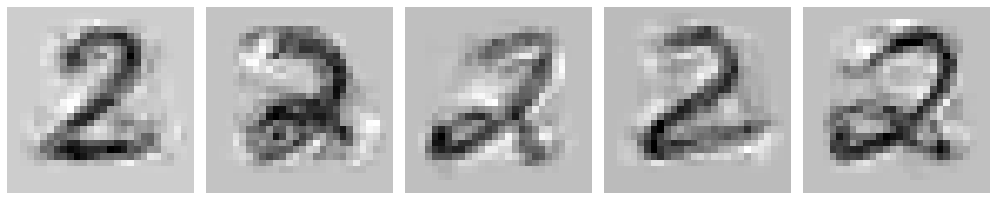

In [160]:
writeNumber(22222)

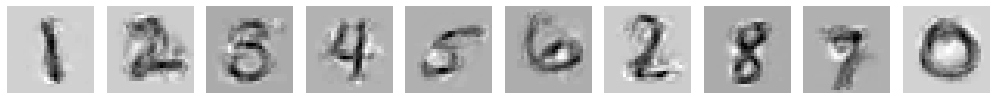

In [154]:
writeNumber(1234567890)